## CIFAR-10 UAP - Attack Generation
We generate (via SGD), visualize, and evaluate the following UAPs:
1. Untargeted UAP
2. Targeted UAP

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import torch

sys.path.append(os.path.realpath('..'))

from attacks import uap_sgd
from utils import loader_cifar, model_cifar, evaluate

dir_data = '/data/cifar10'
dir_uap = '../uaps/cifar10/'
# trainloader = loader_cifar(dir_data = dir_data, train = True)
testloader = loader_cifar(dir_data = dir_data, train = False)

Files already downloaded and verified


In [2]:
# load model
model, best_acc = model_cifar('resnet18', ckpt_path = '../resnet18.pth')
print(best_acc)

94.02


In [3]:
# clean accuracy
_, _, _, _, outputs, labels = evaluate(model, testloader)
print('Accuracy:', sum(outputs == labels) / len(labels))

Accuracy: 0.9402


## 1. Untargeted UAP
Recommended to try several restarts and choose the best untargeted UAP

In [4]:
nb_epoch = 10
eps = 10 / 255
beta = 10
uap, losses = uap_sgd(model, testloader, nb_epoch, eps, beta)

epoch 1/10
epoch 2/10
epoch 3/10
epoch 4/10
epoch 5/10
epoch 6/10
epoch 7/10
epoch 8/10
epoch 9/10
epoch 10/10


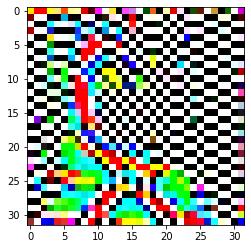

In [5]:
# visualize UAP
plt.imshow(np.transpose(((uap / eps) + 1) / 2, (1, 2, 0)))

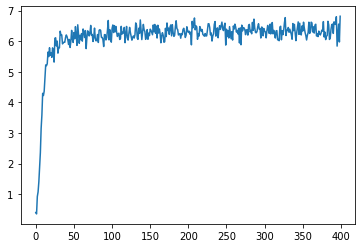

In [6]:
# plot loss
plt.plot(losses)

In [7]:
# evaluate
_, _, _, _, outputs, labels = evaluate(model, testloader, uap = uap)
print('Accuracy:', sum(outputs == labels) / len(labels))

Accuracy: 0.1507


(array([1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
        1000.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

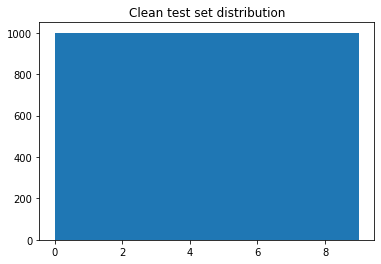

In [8]:
# plot histogram
plt.title('Clean test set distribution')
plt.hist(labels)

(array([  22.,  154., 9435.,   59.,   18.,   10.,   86.,   59.,   22.,
         135.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

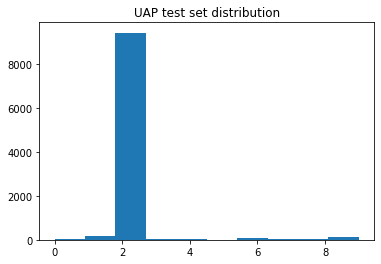

In [9]:
# plot histogram
plt.title('UAP test set distribution')
plt.hist(outputs)

## 2. Targeted UAP

In [10]:
nb_epoch = 10
eps = 10 / 255
y_target = 7
beta = 10
uap, losses = uap_sgd(model, testloader, nb_epoch, eps, beta, y_target = y_target)

epoch 1/10
epoch 2/10
epoch 3/10
epoch 4/10
epoch 5/10
epoch 6/10
epoch 7/10
epoch 8/10
epoch 9/10
epoch 10/10


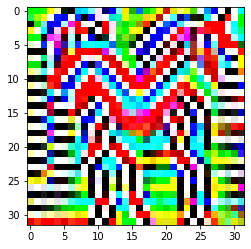

In [11]:
# visualize UAP
plt.imshow(np.transpose(((uap / eps) + 1) / 2, (1, 2, 0)))

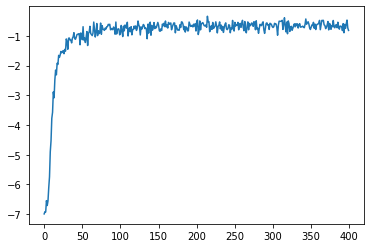

In [12]:
# plot loss
plt.plot(losses)

In [13]:
# evaluate
_, _, _, _, outputs, labels = evaluate(model, testloader, uap = uap)
print('Accuracy:', sum(outputs == labels) / len(labels))
print('Targeted success rate:', sum(outputs == y_target) / len(labels))

Accuracy: 0.2143
Targeted success rate: 0.8636


(array([1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
        1000.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

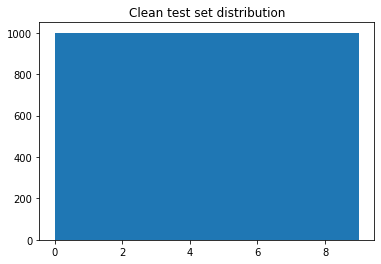

In [14]:
# plot histogram
plt.title('Clean test set distribution')
plt.hist(labels)

(array([ 114.,  260.,  167.,   35.,   62.,   45.,  239., 8636.,   83.,
         359.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

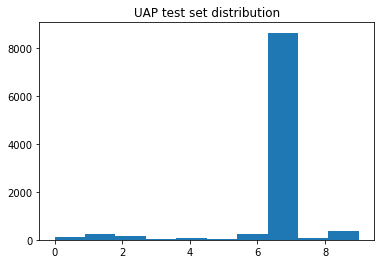

In [15]:
# plot histogram
plt.title('UAP test set distribution')
plt.hist(outputs)